In [1]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/giorgiod/Documents/horton_test/Alchemy CO-N2/Carbon Monoxide')

In [2]:
from optimiz import optimiz
from co_scf2 import b3lyp
Mu_CO=periodic['c'].mass*periodic['o'].mass/(periodic['c'].mass+periodic['o'].mass)
def to_cm(k,Mu=Mu_CO):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

def taylor4(dx,f,d1,d2,d3,d4):
    return f+dx*d1+0.5*d2*dx**2+d3*dx**3/6.+d4*dx**4/24.

In [31]:
%store -r

In [4]:
def FivePointDerivatives(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(b3lyp(x+h*(i-2)))
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2,Mu_CO)
    return (x,points[2],fd1,fd2,fd3,fd4)

To obtain the point of minium we have to predict were the derivative is minimum, in particular we have to solve:
$ \frac{1}{6}f^{(4)}dx^3 +\frac{1}{2}f^{(3)}dx^2+ f'' dx+f'=0 $
which has the solution: $dx=-(b+C+\frac {\Delta _0}{C})\frac {1}{3a}$  where:
$\Delta _{0}=b^{2}-3ac$ , $\Delta _{1}=2b^{3}-9abc+27a^{2}d$ , 
$C={\sqrt[{3}]{\frac {\Delta _{1}\pm {\sqrt {{\Delta _{1}}^{2}-4{\Delta _{0}}^{3}}}}{2}}}$

In [5]:
def dx2f1(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3
    return (x+dx,to_cm(p2d,Mu_CO))

def dx2f2(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3+dx**2*d4/2.
    return (x+dx,to_cm(p2d,Mu_CO))

def dx3f1(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3
        return (x+dx,to_cm(p2d,Mu_CO))
    else: return(1.,0.)
    
def dx3f2(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3+dx**2*d4/2.
        return (x+dx,to_cm(p2d,Mu_CO))
    else: return(1.,0.)
    

def dx4f2(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
    D1=2*b**3-9*a*b*c+27*a**2*d
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2
    return x+dx, to_cm(p2d,Mu_CO)

def dx4f2C(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
    D1=2*b**3-9*a*b*c+27*a**2*d
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2+d4**2/d3*dx**3/6.
    return x+dx, to_cm(p2d,Mu_CO)

Now we shall compare the energies - minimum energy: -112.78181256

In [9]:
DerivativesH05=[]
for x in np.linspace(1.5,2.8,66):
    DerivativesH05.append(FivePointDerivatives(x,.05))

 _ __ _
/ (..) \ Welcome to HORTON 2.1.1!
\/ || \/
 |_''_|  HORTON is written and maintained by by Toon Verstraelen (1).

         This version contains contributions from Toon Verstraelen (1), Pawel Tecmer (2),
         Farnaz Heidar-Zadeh (2), Cristina E. González-Espinoza (2), Matthew Chan (2),
         Taewon D. Kim (2), Katharina Boguslawski (2), Stijn Fias (3),
         Steven Vandenbrande (1), Diego Berrocal (2), and Paul W. Ayers (2)

         (1) Center for Molecular Modeling (CMM), Ghent University, Ghent, Belgium.
         (2) The Ayers Group, McMaster University, Hamilton, Ontario, Canada.
         (3) General Chemistry (ALGC), Free University of Brussels, Brussels, Belgium.

         More information about HORTON can be found on this website:
         http://theochem.github.com/horton/

         The purpose of this log file is to track the progress and quality of a
         computation. Useful numerical output may be written to a checkpoint
         file and is accessible 

/home/giorgiod/.local/lib/python2.7/site-packages/horton/quadprog.py:621: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lagrange = np.linalg.lstsq(r_free.T, -g_free)[0]


   1  1.16794e+00                          3     -112.2741533647603
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.89134e-01                          4     -112.3888953569483
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  7.49687e-01                          5     -112.3944995093933
   3               1.000e+00    0.5568830  5 E                        -0.0096724
   4  1.46194e-01                          6     -112.4173009388170
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.76914e-01                          6     -112.4169600299892
   5               1.000e+00    0.4147820  6 E                        -0.0003441
   6  1.48309e-02                          6     -112.4180468933359
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.75279e-02                          6     -112.4180439574734
   7               1.000e+00    0.4258

   4  9.16219e-02                          6     -112.7592670122279
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  7.80602e-02                          6     -112.7594056997835
   5               1.000e+00    0.6156646  6 E                        -0.0000886
   6  2.22424e-02                          6     -112.7596643504585
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.93572e-02                          6     -112.7596509876030
   7               1.000e+00    0.3804460  6 E                        -0.0000081
   8  3.37607e-03                          6     -112.7596823597306
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  4.37308e-03                          6     -112.7596820848292
   9               1.139e+09    0.7799968  6 M                                  
  10  3.62353e-05                          6     -112.7596827988925
  10               1.234e+11    1.0029

   7  6.41844e-02                          6     -112.9934949607479
   7               1.000e+00    0.3441709  6 E                        -0.0000313
   8  9.88558e-03                          6     -112.9936482053365
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.42401e-02                          6     -112.9936441766611
   9               1.000e+00    0.3460316  6 E                        -0.0000016
  10  2.16132e-03                          6     -112.9936517397519
  10               0.000e+00    1.0000000  6 E                         0.0000000
  11  3.09890e-03                          6     -112.9936515513799
  11               7.485e+08    0.4869003  6 M                                  
  12  1.83626e-05                          6     -112.9936519185524
  12               9.934e+10    0.9525023  6 M                                  
  13  1.13216e-06                          6     -112.9936519185653
  13               1.758e+12    1.0271

   6  1.88297e-02                          6     -112.6701593386224
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.36624e-02                          6     -112.6701521978085
   7               1.000e+00    0.4020714  6 E                        -0.0000059
   8  2.18320e-03                          6     -112.6701723106372
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  2.47256e-03                          6     -112.6701722738582
   9               3.022e+09    0.7076901  6 M                                  
  10  1.67649e-05                          6     -112.6701725032578
  10               2.745e+11    1.0165856  6 M                                  
  11  7.81511e-07                          6     -112.6701725032707
  11               8.313e+12    1.0049570  6 M                                  
  12  5.68131e-09                          6     -112.6701725032714
  12               1.193e+15    1.0241

   8  2.24306e-03                          6     -112.9327418252257
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  2.35826e-03                          6     -112.9327418150109
   9               4.467e+07    0.5355412  6 M                                  
  10  1.09492e-04                          6     -112.9327420451334
  10               5.937e+09    0.9155827  6 M                                  
  11  3.61120e-05                          6     -112.9327420455336
  11               1.280e+11    0.9929674  6 M                                  
  12  1.37603e-07                          6     -112.9327420455830
  12               9.788e+12    1.0173911  6 M                                  
  13  2.39744e-09                          6     -112.9327420455826
  13               5.703e+13    1.0750625  6 C                                  
  14  1.09871e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   8  2.11268e-03                          6     -112.5700389847323
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  2.67413e-03                          6     -112.5700388889004
   9               7.224e+08    0.6271306  6 M                                  
  10  4.72207e-05                          6     -112.5700391450258
  10               5.604e+10    0.9566171  6 M                                  
  11  9.90452e-06                          6     -112.5700391451036
  11               3.627e+11    0.9489214  6 M                                  
  12  1.30620e-08                          6     -112.5700391451067
  12               3.000e+13    1.0214494  6 C                                  
  13  5.21722e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  2.22764e-05                          6     -112.8642415619333
  10               1.906e+11    1.0043353  6 M                                  
  11  8.23243e-07                          6     -112.8642415619517
  11               6.425e+12    1.0096599  6 M                                  
  12  9.39785e-09                          6     -112.8642415619521
  12               8.000e+14    1.0159910  6 M                                  
  13  1.72622e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.939292267139
                                           hartree       84.294863725622
                                        grid_group      -11.633150033344

  11  8.16090e-04                          6     -113.0643184260265
  11               7.727e+11    1.1371827  6 M                                  
  12  5.18670e-04                          6     -113.0643184415044
  12               1.092e+12    0.8452747  6 M                                  
  13  3.75544e-06                          6     -113.0643184519630
  13               3.629e+13    1.0093476  6 M                                  
  14  1.40743e-07                          6     -113.0643184519640
  14               1.204e+14    0.8792950  6 M                                  
  15  2.69180e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.077757297

  10  5.00916e-05                          6     -112.7873367648829
  10               9.061e+10    1.0175099  6 M                                  
  11  6.11897e-06                          6     -112.7873367649783
  11               2.102e+12    1.0104384  6 M                                  
  12  6.22549e-08                          6     -112.7873367649797
  12               2.411e+14    1.0337234  6 M                                  
  13  1.00990e-09                          6     -112.7873367649797
  13               9.581e+14    0.9633400  6 C                                  
  14  4.57886e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      116.233655153

  12  7.78061e-08                          6     -113.0123981152672
  12               4.347e+11    0.9971768  6 C                                  
  13  1.67906e-09                          6     -113.0123981152667
  13               1.276e+12    0.9962774  6 C                                  
  14  2.22747e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.318018261927
                                           hartree       83.119103357456
                                        grid_group      -11.567788641178
                                              x_hf       -2.750976641580
                                                ne     -326.944419048167
  

  13  1.67254e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      116.546110100190
                                           hartree       85.367352303188
                                        grid_group      -11.694287658837
                                              x_hf       -2.782941399611
                                                ne     -332.569803302784
                                                nn       32.432432432432
                                             total     -112.701137525420
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d150>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26641e+01                          1      -96.8343325994878
   0  9.86301e+00                          2      -97.2110292267634
   0               1.000e+00    0.5060961  2 E                        -7.5368740
   1  1.55174e+00                          3     -112.8618696901252
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.29245e+01                          1      -96.3668616958353
   0  9.90567e+00                          2      -96.2315467024698
   0               1.000e+00    0.4978468  2 E                        -7.7880165
   1  1.25149e+00                          3     -112.6143843689826
   1               0.000e+00    1.0000000  3 E                  

   0  1.27235e+01                          1      -96.7499249095479
   0  9.89100e+00                          2      -96.9609986682553
   0               1.000e+00    0.5033986  2 E                        -7.6581072
   1  1.45674e+00                          3     -112.8237798001320
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.65475e+00                          4     -112.8869928506231
   2               1.000e+00    0.6728357  4 E                        -0.0195738
   3  1.08944e+00                          5     -112.9477160820297
   3               1.000e+00    0.6775043  5 E                        -0.0177895
   4  3.11478e-01                          6     -112.9899909210438
   4               1.000e+00    0.9764846  6 E                        -0.0000245
   5  3.97654e-01                          6     -112.9875977304843
   5               1.000e+00    0.3941258  6 E                        -0.0017556
   6  4.44495e-02                     

   0  1.27444e+01                          1      -91.8060636215678
   0  9.83867e+00                          2      -96.5387660068005
   0               1.000e+00    0.5648002  2 E                        -6.9164057
   1  2.79104e+00                          3     -112.6462243306654
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.96026e+00                          4     -112.1093516407394
   2               1.000e+00    0.3320094  4 E                        -0.1761397
   3  3.01834e-01                          5     -113.1464547763845
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.65635e-01                          6     -113.1419470046371
   4               1.000e+00    0.3436115  6 E                        -0.0017016
   5  5.52706e-02                          6     -113.1505716147102
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  8.82546e-02                     

   0  1.27855e+01                          1      -96.6519794901255
   0  9.89155e+00                          2      -96.7598897239173
   0               1.000e+00    0.5017325  2 E                        -7.7318334
   1  1.38130e+00                          3     -112.7733574817724
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.41983e+00                          4     -112.8541701425903
   2               1.000e+00    0.7891814  4 E                        -0.0062101
   3  1.24658e+00                          5     -112.8727317796069
   3               1.000e+00    0.5586865  5 E                        -0.0307994
   4  1.30391e-01                          6     -112.9320977437741
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.71962e-01                          6     -112.9316285016049
   5               1.000e+00    0.3787204  6 E                        -0.0002775
   6  1.85209e-02                     

   0  1.28631e+01                          1      -91.5805955345808
   0  9.83489e+00                          2      -96.4041495569062
   0               1.000e+00    0.5660198  2 E                        -6.8802268
   1  2.74076e+00                          3     -112.6315644980485
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.70154e+00                          4     -112.1952520640992
   2               1.000e+00    0.3462835  4 E                        -0.1701808
   3  2.05365e-01                          5     -113.1080589695231
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.94858e-01                          6     -113.1067533146507
   4               1.000e+00    0.3884180  6 E                        -0.0008827
   5  1.41864e-02                          6     -113.1102232609255
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.11202e-02                     

   0  1.28458e+01                          1      -96.5398854002788
   0  9.90502e+00                          2      -96.5451868447540
   0               1.000e+00    0.5000848  2 E                        -7.8108942
   1  1.32004e+00                          3     -112.7123442961915
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.23331e+00                          4     -112.8045071419733
   2               1.000e+00    0.9164185  4 E                        -0.0007731
   3  1.36281e+00                          5     -112.7925709422131
   3               1.000e+00    0.4593964  5 E                        -0.0310204
   4  7.15770e-02                          6     -112.8639900996262
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  5.62934e-02                          6     -112.8640955759324
   5               1.000e+00    0.6623437  6 E                        -0.0000370
   6  1.95478e-02                     

   0  1.26434e+01                          1      -96.8595656742431
   0  9.89453e+00                          2      -97.2364944422897
   0               1.000e+00    0.5060946  2 E                        -7.5434590
   1  1.57840e+00                          3     -112.8740631236368
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.03118e+00                          4     -112.9022734546732
   2               1.000e+00    0.5527728  4 E                        -0.0534594
   3  8.64221e-01                          5     -113.0353103057941
   3               1.000e+00    0.8391927  5 E                        -0.0050712
   4  6.08183e-01                          6     -113.0500933696028
   4               1.000e+00    0.6472285  6 E                        -0.0062478
   5  1.34627e-01                          6     -113.0636116470808
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.05243e-01                     

   0  1.25869e+01                          1      -92.0928811482343
   0  9.84456e+00                          2      -96.6995252866167
   0               1.000e+00    0.5630922  2 E                        -6.9688093
   1  2.86615e+00                          3     -112.6489586107336
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.32845e+00                          4     -111.9527309795410
   2               1.000e+00    0.3153590  4 E                        -0.1875011
   3  4.37216e-01                          5     -113.1884191679966
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.96207e-01                          6     -113.1769873631354
   4               1.000e+00    0.3249490  6 E                        -0.0034479
   5  1.08328e-01                          6     -113.1965070490943
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.80778e-01                     

   0  1.27046e+01                          1      -96.7792884167168
   0  9.89837e+00                          2      -97.0687628085460
   0               1.000e+00    0.5046717  2 E                        -7.6012992
   1  1.49732e+00                          3     -112.8360971773545
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.76995e+00                          4     -112.8902472489314
   2               1.000e+00    0.6308844  4 E                        -0.0281842
   3  1.01807e+00                          5     -112.9722837932055
   3               1.000e+00    0.7307056  5 E                        -0.0128936
   4  4.03352e-01                          6     -113.0062264294606
   4               1.000e+00    0.8693672  6 E                        -0.0007841
   5  3.14840e-01                          6     -113.0085895309885
   5               1.000e+00    0.6009873  6 E                        -0.0018628
   6  4.29652e-02                     

   1  2.80901e+00                          3     -112.6487070943869
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.05009e+00                          4     -112.0748348843760
   2               1.000e+00    0.3275908  4 E                        -0.1786028
   3  3.35426e-01                          5     -113.1579008766766
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.23283e-01                          6     -113.1519510586120
   4               1.000e+00    0.3368616  6 E                        -0.0020693
   5  6.93216e-02                          6     -113.1628609353872
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.12424e-01                          6     -113.1625534974947
   6               1.000e+00    0.3126528  6 E                        -0.0000802
   7  2.02077e-02                          6     -113.1630440672523
   7               1.000e+00    0.9572

   0  1.27647e+01                          1      -96.6860710167140
   0  9.90979e+00                          2      -96.8402808418961
   0               1.000e+00    0.5024786  2 E                        -7.7000044
   1  1.41196e+00                          3     -112.7905383199431
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.51181e+00                          4     -112.8649486280974
   2               1.000e+00    0.7390035  4 E                        -0.0106040
   3  1.18294e+00                          5     -112.8998259238005
   3               1.000e+00    0.6072341  5 E                        -0.0250869
   4  1.99495e-01                          6     -112.9523596323627
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.76919e-01                          6     -112.9509489713590
   5               1.000e+00    0.3579848  6 E                        -0.0006365
   6  3.83049e-02                     

   0  1.28235e+01                          1      -91.6567392224952
   0  9.83568e+00                          2      -96.4503694051830
   0               1.000e+00    0.5656190  2 E                        -6.8920212
   1  2.75684e+00                          3     -112.6376637022504
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.78578e+00                          4     -112.1695293045143
   2               1.000e+00    0.3413601  4 E                        -0.1719307
   3  2.36372e-01                          5     -113.1215516769171
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.51142e-01                          6     -113.1193629019321
   4               1.000e+00    0.3669151  6 E                        -0.0011071
   5  2.56450e-02                          6     -113.1242735886313
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.64487e-02                     

   0  1.24309e+01                          1      -92.3640998867758
   0  9.85204e+00                          2      -96.8392606369865
   0               1.000e+00    0.5612913  2 E                        -7.0263860
   1  2.94957e+00                          3     -112.6319831248781
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.71506e+00                          4     -111.7437838765957
   2               1.000e+00    0.3014751  4 E                        -0.2033144
   3  5.70335e-01                          5     -113.2208748190345
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  9.20933e-01                          6     -113.1995674134702
   4               1.000e+00    0.3175059  6 E                        -0.0058851
   5  1.54242e-01                          6     -113.2344683997198
   5               1.000e+00    0.9922539  6 E                        -0.0000008
   6  2.55207e-01                     

   0  1.29423e+01                          1      -91.4253545407163
   0  9.83389e+00                          2      -96.3074694975928
   0               1.000e+00    0.5668012  2 E                        -6.8575365
   1  2.71048e+00                          3     -112.6158046704667
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.53907e+00                          4     -112.2384853117381
   2               1.000e+00    0.3566172  4 E                        -0.1673349
   3  1.50650e-01                          5     -113.0789067309842
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.86090e-01                          6     -113.0788489992279
   4               1.000e+00    0.4883889  6 E                        -0.0005930
   5  4.28435e-02                          6     -113.0801892941395
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.39237e-02                     

   0  1.25478e+01                          1      -92.1621364621232
   0  9.84613e+00                          2      -96.7363674314020
   0               1.000e+00    0.5626498  2 E                        -6.9827598
   1  2.88627e+00                          3     -112.6465893533774
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.42390e+00                          4     -111.9054946684895
   2               1.000e+00    0.3116159  4 E                        -0.1910023
   3  4.71172e-01                          5     -113.1973667921584
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  7.53642e-01                          6     -113.1837191942763
   4               1.000e+00    0.3225415  6 E                        -0.0040004
   5  1.20433e-01                          6     -113.2067045087843
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.02521e-01                     

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9db10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26655e+01                          1      -91.9514388538480
   0  9.84173e+00                          2      -96.6218619766510
   0               1.000e+00    0.5639590  2 E                        -6.9419138
   1  2.82749e+00                          3     -112.6500072882429
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.14141e+00                          4     -112.0373153444457
   2 

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d210>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22769e+01                          1      -92.6200827445863
   0  9.86235e+00                          2      -96.9591528903821
   0               1.000e+00    0.5594137  2 E                        -7.0882994
   1  3.03951e+00                          3     -112.5948494423118
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d190>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27839e+01                          1      -91.7318954560735
   0  9.83700e+00                          2      -96.4952307322931
   0               1.000e+00    0.5652123  2 E                        -6.9040831
   1  2.77362e+00                          3     -112.6425467091219
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9ded0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23922e+01                          1      -92.4295070777715
   0  9.85440e+00                          2      -96.8710672731012
   0               1.000e+00    0.5608289  2 E                        -7.0414732
   1  2.97152e+00                          3     -112.6245972145384
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.81290e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9dc10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.29027e+01                          1      -91.5034662381148
   0  9.83435e+00                          2      -96.3565210539067
   0               1.000e+00    0.5664139  2 E                        -6.8687309
   1  2.72531e+00                          3     -112.6242748499077
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d6d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.21252e+01                          1      -92.8612873506738
   0  9.87409e+00                          2      -97.0599665591105
   0               1.000e+00    0.5574619  2 E                        -7.1549093
   1  3.13546e+00                          3     -112.5371002242971
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d5d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26262e+01                          1      -92.0226500192917
   0  9.84311e+00                          2      -96.6613626777846
   0               1.000e+00    0.5635287  2 E                        -6.9551908
   1  2.84654e+00                          3     -112.6500960922553
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9da50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22387e+01                          1      -92.6817505081723
   0  9.86520e+00                          2      -96.9861116512150
   0               1.000e+00    0.5589328  2 E                        -7.1044639
   1  3.06294e+00                          3     -112.5823645737199
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9db50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27444e+01                          1      -91.8060636215680
   0  9.83867e+00                          2      -96.5387660068005
   0               1.000e+00    0.5648002  2 E                        -6.9164057
   1  2.79104e+00                          3     -112.6462243306657
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9db10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23536e+01                          1      -92.4939684702080
   0  9.85692e+00                          2      -96.9016436834601
   0               1.000e+00    0.5603617  2 E                        -7.0568205
   1  2.99383e+00                          3     -112.6159514589246
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d990>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19763e+01                          1      -93.0881988114526
   0  9.88625e+00                          2      -97.1425528791736
   0               1.000e+00    0.5554386  2 E                        -7.2267550
   1  3.23509e+00                          3     -112.4591903757419
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d650>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.24697e+01                          1      -92.2977400067859
   0  9.84984e+00                          2      -96.8062088960256
   0               1.000e+00    0.5617490  2 E                        -7.0115698
   1  2.92801e+00                          3     -112.6381132353016
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d210>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.20877e+01                          1      -92.9193362130024
   0  9.87712e+00                          2      -97.0822898892074
   0               1.000e+00    0.5569625  2 E                        -7.1723898
   1  3.16020e+00                          3     -112.5194493799959
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9dad0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.25869e+01                          1      -92.0928811482347
   0  9.84456e+00                          2      -96.6995252866164
   0               1.000e+00    0.5630922  2 E                        -6.9688093
   1  2.86615e+00                          3     -112.6489586107339
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.32845e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d490>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22007e+01                          1      -92.7425021144081
   0  9.86812e+00                          2      -97.0118910170393
   0               1.000e+00    0.5584472  2 E                        -7.1209457
   1  3.08677e+00                          3     -112.5685748333856
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d4d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.18304e+01                          1      -93.3013047214256
   0  9.89709e+00                          2      -97.2079015746721
   0               1.000e+00    0.5533545  2 E                        -7.3033789
   1  3.33386e+00                          3     -112.3634011077027
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d710>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23152e+01                          1      -92.5574912348764
   0  9.85958e+00                          2      -96.9310013067519
   0               1.000e+00    0.5598900  2 E                        -7.0724260
   1  3.01649e+00                          3     -112.6060397205814
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.00802e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d250>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19395e+01                          1      -93.1427503246227
   0  9.88923e+00                          2      -97.1604564014655
   0               1.000e+00    0.5549226  2 E                        -7.2454898
   1  3.26005e+00                          3     -112.4367984584790
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d510>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.24309e+01                          1      -92.3640998867759
   0  9.85204e+00                          2      -96.8392606369866
   0               1.000e+00    0.5612913  2 E                        -7.0263860
   1  2.94957e+00                          3     -112.6319831248784
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d550>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.20504e+01                          1      -92.9764993592841
   0  9.88017e+00                          2      -97.1034858538117
   0               1.000e+00    0.5564587  2 E                        -7.1901961
   1  3.18510e+00                          3     -112.5005577015474
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d9d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16877e+01                          1      -93.5011115059802
   0  9.90639e+00                          2      -97.2571238260693
   0               1.000e+00    0.5512217  2 E                        -7.3842477
   1  3.42829e+00                          3     -112.2528221574411
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9de50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.21629e+01                          1      -92.8023451868685
   0  9.87108e+00                          2      -97.0365046686310
   0               1.000e+00    0.5579568  2 E                        -7.1377600
   1  3.11097e+00                          3     -112.5534823875576
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d110>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17944e+01                          1      -93.3524825897651
   0  9.89920e+00                          2      -97.2217269338577
   0               1.000e+00    0.5528262  2 E                        -7.3231827
   1  3.35794e+00                          3     -112.3370226867577
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9dd50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22769e+01                          1      -92.6200827445864
   0  9.86235e+00                          2      -96.9591528903818
   0               1.000e+00    0.5594137  2 E                        -7.0882994
   1  3.03951e+00                          3     -112.5948494423116
   1               0.000e+00    1.0000000  3 E                  


Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d190>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19030e+01                          1      -93.1964465962705
   0  9.89209e+00                          2      -97.1772980454967
   0               1.000e+00    0.5544031  2 E                        -7.2645151
   1  3.28485e+00                          3     -112.4133364610250
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.98849e+00   

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d4d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15485e+01                          1      -93.6881730857686
   0  9.91453e+00                          2      -97.2907589411516
   0               1.000e+00    0.5490417  2 E                        -7.4695004
   1  3.51491e+00                          3     -112.1324107529853
   1               1.000e+00    0.9993067  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d910>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.20133e+01                          1      -93.0327843639316
   0  9.88322e+00                          2      -97.1235682991299
   0               1.000e+00    0.5559506  2 E                        -7.2083208
   1  3.21008e+00                          3     -112.4804585641411
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d150>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16525e+01                          1      -93.5490487458699
   0  9.90870e+00                          2      -97.2669400132467
   0               1.000e+00    0.5506807  2 E                        -7.4051610
   1  3.45082e+00                          3     -112.2234256329894
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.44092e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9da50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.21252e+01                          1      -92.8612873506740
   0  9.87409e+00                          2      -97.0599665591105
   0               1.000e+00    0.5574619  2 E                        -7.1549093
   1  3.13546e+00                          3     -112.5371002242973
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d5d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17586e+01                          1      -93.4028373025954
   0  9.90149e+00                          2      -97.2345437348879
   0               1.000e+00    0.5522948  2 E                        -7.3432525
   1  3.38174e+00                          3     -112.3097222434630
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38490>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14130e+01                          1      -93.8631075413590
   0  9.91736e+00                          2      -97.3102749420900
   0               1.000e+00    0.5468285  2 E                        -7.5586945
   1  3.59065e+00                          3     -112.0073421087462
   1               1.000e+00    0.9830406  3 E                        -0.0043756
   2  7.55739e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd389d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.18666e+01                          1      -93.2492954185609
   0  9.89477e+00                          2      -97.1930981468108
   0               1.000e+00    0.5538802  2 E                        -7.2838188
   1  3.30952e+00                          3     -112.3888303611895
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.06276e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd381d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15142e+01                          1      -93.7330180653866
   0  9.91618e+00                          2      -97.2968651371858
   0               1.000e+00    0.5484904  2 E                        -7.4914733
   1  3.53508e+00                          3     -112.1012866891653
   1               1.000e+00    0.9951471  3 E                        -0.0003521
   2  7.57392e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd386d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19763e+01                          1      -93.0881988114526
   0  9.88625e+00                          2      -97.1425528791736
   0               1.000e+00    0.5554386  2 E                        -7.2267550
   1  3.23509e+00                          3     -112.4591903757419
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38610>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16176e+01                          1      -93.5961983518941
   0  9.91083e+00                          2      -97.2758056296992
   0               1.000e+00    0.5501369  2 E                        -7.4263435
   1  3.47280e+00                          3     -112.1935081345471
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.49302e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30590>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12815e+01                          1      -94.0265895916977
   0  9.91579e+00                          2      -97.3161139370690
   0               1.000e+00    0.5445815  2 E                        -7.6519102
   1  3.65351e+00                          3     -111.8833629044684
   1               1.000e+00    0.9677261  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30c90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17230e+01                          1      -93.4523773598229
   0  9.90395e+00                          2      -97.2463345350141
   0               1.000e+00    0.5517599  2 E                        -7.3636090
   1  3.40524e+00                          3     -112.2816171821874
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13797e+01                          1      -93.9050244676163
   0  9.91755e+00                          2      -97.3129531921320
   0               1.000e+00    0.5462693  2 E                        -7.5816493
   1  3.60757e+00                          3     -111.9760777101291
   1               1.000e+00    0.9791299  3 E                        -0.0066649
   2  7.55246e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd382d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.18304e+01                          1      -93.3013047214256
   0  9.89709e+00                          2      -97.2079015746721
   0               1.000e+00    0.5533545  2 E                        -7.3033789
   1  3.33386e+00                          3     -112.3634011077027
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc305d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14802e+01                          1      -93.7771151049523
   0  9.91723e+00                          2      -97.3021760006942
   0               1.000e+00    0.5479382  2 E                        -7.5136457
   1  3.55446e+00                          3     -112.0699548005287
   1               1.000e+00    0.9910600  3 E                        -0.0012018
   2  7.56834e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30810>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11542e+01                          1      -94.1793207920846
   0  9.90636e+00                          2      -97.3097463116320
   0               1.000e+00    0.5423144  2 E                        -7.7485354
   1  3.70269e+00                          3     -111.7648367385521
   1               1.000e+00    0.9537237  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30910>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15829e+01                          1      -93.6425698643237
   0  9.91277e+00                          2      -97.2837395414733
   0               1.000e+00    0.5495905  2 E                        -7.4477914
   1  3.49417e+00                          3     -112.1631466888068
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.54230e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30950>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12493e+01                          1      -94.0657528698565
   0  9.91425e+00                          2      -97.3156123680580
   0               1.000e+00    0.5440161  2 E                        -7.6757691
   1  3.66710e+00                          3     -111.8530698793937
   1               1.000e+00    0.9640948  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30ed0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16877e+01                          1      -93.5011115059802
   0  9.90639e+00                          2      -97.2571238260693
   0               1.000e+00    0.5512217  2 E                        -7.3842477
   1  3.42829e+00                          3     -112.2528221574411
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d310>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13467e+01                          1      -93.9462364317091
   0  9.91739e+00                          2      -97.3148048166899
   0               1.000e+00    0.5457083  2 E                        -7.6048423
   1  3.62373e+00                          3     -111.9449364921269
   1               1.000e+00    0.9752428  3 E                        -0.0094342
   2  7.54707e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38650>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10312e+01                          1      -94.3219897171659
   0  9.88725e+00                          2      -97.2926248967407
   0               1.000e+00    0.5400408  2 E                        -7.8479323
   1  3.73831e+00                          3     -111.6548709959899
   1               1.000e+00    0.9411609  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30590>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14465e+01                          1      -93.8204747002888
   0  9.91709e+00                          2      -97.3067252688089
   0               1.000e+00    0.5473854  2 E                        -7.5360005
   1  3.57293e+00                          3     -112.0386157968533
   1               1.000e+00    0.9870220  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30f10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11230e+01                          1      -94.2159052599693
   0  9.90254e+00                          2      -97.3064155946300
   0               1.000e+00    0.5417461  2 E                        -7.7731521
   1  3.71284e+00                          3     -111.7364540474653
   1               1.000e+00    0.9504452  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30b50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15485e+01                          1      -93.6881730857686
   0  9.91453e+00                          2      -97.2907589411516
   0               1.000e+00    0.5490417  2 E                        -7.4695004
   1  3.51491e+00                          3     -112.1324107529853
   1               1.000e+00    0.9993067  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21850>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12173e+01                          1      -94.1042552655578
   0  9.91219e+00                          2      -97.3143686430178
   0               1.000e+00    0.5434497  2 E                        -7.6998330
   1  3.67983e+00                          3     -111.8231853246255
   1               1.000e+00    0.9605497  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccc30490>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09127e+01                          1      -94.4552417094734
   0  9.85770e+00                          2      -97.2661424997593
   0               1.000e+00    0.5377736  2 E                        -7.9494409
   1  3.76114e+00                          3     -111.5552002004658
   1               1.000e+00    0.9299994  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38790>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13140e+01                          1      -93.9867544565590
   0  9.91682e+00                          2      -97.3158516688849
   0               1.000e+00    0.5451456  2 E                        -7.6282652
   1  3.63905e+00                          3     -111.9140068240009
   1               1.000e+00    0.9714421  3 E                        -0.0126267
   2  7.54209e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38550>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10012e+01                          1      -94.3561615299293
   0  9.88085e+00                          2      -97.2868343314967
   0               1.000e+00    0.5394730  2 E                        -7.8731341
   1  3.74515e+00                          3     -111.6289450380539
   1               1.000e+00    0.9382645  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9d790>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14130e+01                          1      -93.8631075413590
   0  9.91736e+00                          2      -97.3102749420900
   0               1.000e+00    0.5468285  2 E                        -7.5586945
   1  3.59065e+00                          3     -112.0073421087462
   1               1.000e+00    0.9830406  3 E                        -0.0043756
   2  7.55739e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21290>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10922e+01                          1      -94.2518714674749
   0  9.89809e+00                          2      -97.3024371910580
   0               1.000e+00    0.5411775  2 E                        -7.7979307
   1  3.72215e+00                          3     -111.7086458707990
   1               1.000e+00    0.9472578  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21c10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07985e+01                          1      -94.5796677423398
   0  9.81777e+00                          2      -97.2310979578548
   0               1.000e+00    0.5355178  2 E                        -8.0527256
   1  3.77212e+00                          3     -111.4666921491795
   1               1.000e+00    0.9201993  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd211d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11856e+01                          1      -94.1421076569672
   0  9.90957e+00                          2      -97.3124054249087
   0               1.000e+00    0.5428824  2 E                        -7.7240919
   1  3.69169e+00                          3     -111.7937597223491
   1               1.000e+00    0.9570922  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38390>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08837e+01                          1      -94.4871537448993
   0  9.84867e+00                          2      -97.2581698998657
   0               1.000e+00    0.5372086  2 E                        -7.9751000
   1  3.76496e+00                          3     -111.5320083468931
   1               1.000e+00    0.9274226  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38c90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12815e+01                          1      -94.0265895916976
   0  9.91579e+00                          2      -97.3161139370688
   0               1.000e+00    0.5445815  2 E                        -7.6519102
   1  3.65351e+00                          3     -111.8833629044685
   1               1.000e+00    0.9677261  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9dcd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09714e+01                          1      -94.3897546136562
   0  9.87379e+00                          2      -97.2804813566466
   0               1.000e+00    0.5389058  2 E                        -7.8984566
   1  3.75125e+00                          3     -111.6036815385776
   1               1.000e+00    0.9354181  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9dd90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06886e+01                          1      -94.6958086980388
   0  9.76780e+00                          2      -97.1881109818137
   0               1.000e+00    0.5332759  2 E                        -8.1575906
   1  3.77249e+00                          3     -111.3894889139027
   1               1.000e+00    0.9116778  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4fcf9a910>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10616e+01                          1      -94.2872296215758
   0  9.89299e+00                          2      -97.2978331442856
   0               1.000e+00    0.5406091  2 E                        -7.8228609
   1  3.73064e+00                          3     -111.6814436270070
   1               1.000e+00    0.9441628  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4fcf9ab10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07706e+01                          1      -94.6094595171418
   0  9.80621e+00                          2      -97.2210573840999
   0               1.000e+00    0.5349557  2 E                        -8.0787966
   1  3.77315e+00                          3     -111.4463301891744
   1               1.000e+00    0.9179544  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53510>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11542e+01                          1      -94.1793207920841
   0  9.90636e+00                          2      -97.3097463116322
   0               1.000e+00    0.5423144  2 E                        -7.7485354
   1  3.70269e+00                          3     -111.7648367385521
   1               1.000e+00    0.9537237  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9de10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08550e+01                          1      -94.5185231139439
   0  9.83900e+00                          2      -97.2496667105992
   0               1.000e+00    0.5366443  2 E                        -8.0008701
   1  3.76805e+00                          3     -111.5095264433257
   1               1.000e+00    0.9249315  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38710>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05831e+01                          1      -94.8041686327321
   0  9.70809e+00                          2      -97.1382968987785
   0               1.000e+00    0.5310569  2 E                        -8.2637594
   1  3.76319e+00                          3     -111.3235558586482
   1               1.000e+00    0.9043006  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38510>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09419e+01                          1      -94.4227783013450
   0  9.86607e+00                          2      -97.2735810802807
   0               1.000e+00    0.5383393  2 E                        -7.9238931
   1  3.75658e+00                          3     -111.5790951546213
   1               1.000e+00    0.9326638  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd383d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06618e+01                          1      -94.7236090300255
   0  9.75378e+00                          2      -97.1762479092629
   0               1.000e+00    0.5327185  2 E                        -8.1840389
   1  3.77104e+00                          3     -111.3719649681060
   1               1.000e+00    0.9097319  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38a10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10312e+01                          1      -94.3219897171658
   0  9.88725e+00                          2      -97.2926248967409
   0               1.000e+00    0.5400408  2 E                        -7.8479323
   1  3.73831e+00                          3     -111.6548709959895
   1               1.000e+00    0.9411609  3 E                        -0.0563544
   2  7.50842e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07430e+01                          1      -94.6387416863656
   0  9.79403e+00                          2      -97.2105341624259
   0               1.000e+00    0.5343947  2 E                        -8.1049610
   1  3.77355e+00                          3     -111.4266702235976
   1               1.000e+00    0.9157874  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd213d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04819e+01                          1      -94.9052296769434
   0  9.63908e+00                          2      -97.0831496512354
   0               1.000e+00    0.5288764  2 E                        -8.3702431
   1  3.74530e+00                          3     -111.2678892710780
   1               1.000e+00    0.8979090  3 E                        -0.1857728
   2  7.48225e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21c10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08266e+01                          1      -94.5493583332842
   0  9.82870e+00                          2      -97.2406391932641
   0               1.000e+00    0.5360807  2 E                        -8.0267476
   1  3.77043e+00                          3     -111.4877556328109
   1               1.000e+00    0.9225243  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21a90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05574e+01                          1      -94.8300996907775
   0  9.69168e+00                          2      -97.1249403068877
   0               1.000e+00    0.5305074  2 E                        -8.2904021
   1  3.75946e+00                          3     -111.3087494940136
   1               1.000e+00    0.9026184  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21450>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09127e+01                          1      -94.4552417094730
   0  9.85770e+00                          2      -97.2661424997596
   0               1.000e+00    0.5377736  2 E                        -7.9494409
   1  3.76114e+00                          3     -111.5552002004656
   1               1.000e+00    0.9299994  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06353e+01                          1      -94.7509307685950
   0  9.73915e+00                          2      -97.1639764547172
   0               1.000e+00    0.5321627  2 E                        -8.2105598
   1  3.76900e+00                          3     -111.3551431604255
   1               1.000e+00    0.9078547  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21810>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03850e+01                          1      -94.9994575306453
   0  9.56194e+00                          2      -97.0237079686647
   0               1.000e+00    0.5267436  2 E                        -8.4763176
   1  3.72013e+00                          3     -111.2208574495419
   1               1.000e+00    0.8923344  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21d10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07157e+01                          1      -94.6675221498473
   0  9.78122e+00                          2      -97.1995459784742
   0               1.000e+00    0.5338346  2 E                        -8.1312275
   1  3.77333e+00                          3     -111.4077225453542
   1               1.000e+00    0.9136957  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd216d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04573e+01                          1      -94.9294094387718
   0  9.62049e+00                          2      -97.0687343424004
   0               1.000e+00    0.5283396  2 E                        -8.3967615
   1  3.73967e+00                          3     -111.2553449723502
   1               1.000e+00    0.8964408  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21510>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07985e+01                          1      -94.5796677423399
   0  9.81777e+00                          2      -97.2310979578546
   0               1.000e+00    0.5355178  2 E                        -8.0527256
   1  3.77212e+00                          3     -111.4666921491798
   1               1.000e+00    0.9201993  3 E                  

  19  3.09730e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.293141206281
                                           hartree       74.759955715350
                                        grid_group      -11.161917105415
                                              x_hf       -2.639442951568
                                                ne     -307.371252096725
                                                nn       20.779220779221
                                             total     -113.340294452855
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  11  2.19543e-02                          6     -113.3209573297876
  11               1.000e+00    0.1822974  6 E                        -0.0000011
  12  5.64569e-03                          6     -113.3209805684930
  12               1.000e+00    0.6335596  6 E                        -0.0000009
  13  2.81432e-03                          6     -113.3209819448313
  13               4.213e+09    1.1516554  6 M                                  
  14  4.19806e-04                          6     -113.3209823335124
  14               3.047e+10    0.9923678  6 M                                  
  15  2.13282e-04                          6     -113.3209823400559
  15               2.134e+10    0.7566425  6 M                                  
  16  3.44670e-07                          6     -113.3209823423494
  16               4.412e+11    0.8613909  6 M                                  
  17  1.39689e-08                          6     -113.3209823423489
  17               4.073e+13    0.9737

   3  1.12832e+00                          5     -113.2825147417151
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.58950e+00                          6     -113.0241557289260
   4               1.000e+00    0.2037005  6 E                        -0.0180904
   5  5.24879e-01                          6     -113.3311335432556
   5               1.000e+00    0.8117057  6 E                        -0.0027651
   6  5.30987e-01                          6     -113.3311369641193
   6               1.000e+00    0.5000471  6 E                        -0.0090824
   7  1.25502e-01                          6     -113.3441336949086
   7               1.000e+00    0.9419675  6 E                        -0.0000495
   8  2.10642e-01                          6     -113.3427459496167
   8               1.000e+00    0.3295794  6 E                        -0.0004423
   9  2.68981e-02                          6     -113.3449795750460
   9               0.000e+00    1.0000

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38bd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04819e+01                          1      -94.9052296769434
   0  9.63908e+00                          2      -97.0831496512354
   0               1.000e+00    0.5288764  2 E                        -8.3702431
   1  3.74530e+00                          3     -111.2678892710780
   1               1.000e+00    0.8979090  3 E                        -0.1857728
   2  7.48225e+00                          4     -108.9732497409578
   2 

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38c90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02476e+01                          1      -95.1289605934196
   0  9.43304e+00                          2      -96.9308043542525
   0               1.000e+00    0.5236804  2 E                        -8.6316735
   1  3.67211e+00                          3     -111.1629786520510
   1               1.000e+00    0.8851330  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05574e+01                          1      -94.8300996907776
   0  9.69168e+00                          2      -97.1249403068880
   0               1.000e+00    0.5305074  2 E                        -8.2904021
   1  3.75946e+00                          3     -111.3087494940131
   1               1.000e+00    0.9026184  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38710>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03151e+01                          1      -95.0659140578199
   0  9.49949e+00                          2      -96.9779025077984
   0               1.000e+00    0.5251940  2 E                        -8.5544122
   1  3.69830e+00                          3     -111.1890216394571
   1               1.000e+00    0.8884929  3 E                        -0.2274156
   2  7.48050e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38150>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06353e+01                          1      -94.7509307685950
   0  9.73915e+00                          2      -97.1639764547172
   0               1.000e+00    0.5321627  2 E                        -8.2105598
   1  3.76900e+00                          3     -111.3551431604255
   1               1.000e+00    0.9078547  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd380d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03850e+01                          1      -94.9994575306453
   0  9.56194e+00                          2      -97.0237079686647
   0               1.000e+00    0.5267436  2 E                        -8.4763176
   1  3.72013e+00                          3     -111.2208574495419
   1               1.000e+00    0.8923344  3 E                        -0.2097339
   2  7.48150e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38650>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01611e+01                          1      -95.2080221526018
   0  9.33958e+00                          2      -96.8654624617768
   0               1.000e+00    0.5217063  2 E                        -8.7339661
   1  3.63218e+00                          3     -111.1348942410905
   1               1.000e+00    0.8812021  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38190>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04573e+01                          1      -94.9294094387719
   0  9.62049e+00                          2      -97.0687343424004
   0               1.000e+00    0.5283396  2 E                        -8.3967615
   1  3.73967e+00                          3     -111.2553449723505
   1               1.000e+00    0.8964408  3 E                        -0.1918881
   2  7.48201e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38250>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02256e+01                          1      -95.1492489206207
   0  9.41017e+00                          2      -96.9146970037347
   0               1.000e+00    0.5231817  2 E                        -8.6573499
   1  3.66265e+00                          3     -111.1552597855753
   1               1.000e+00    0.8840931  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38210>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05320e+01                          1      -94.8555820201566
   0  9.67469e+00                          2      -97.1112785122815
   0               1.000e+00    0.5299606  2 E                        -8.3170443
   1  3.75522e+00                          3     -111.2945610858616
   1               1.000e+00    0.9009949  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38510>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02924e+01                          1      -95.0872996561457
   0  9.47771e+00                          2      -96.9624595046247
   0               1.000e+00    0.5246872  2 E                        -8.5801680
   1  3.68995e+00                          3     -111.1798446286274
   1               1.000e+00    0.8873341  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd382d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00787e+01                          1      -95.2817396871323
   0  9.24131e+00                          2      -96.7980125530410
   0               1.000e+00    0.5197881  2 E                        -8.8350336
   1  3.58685e+00                          3     -111.1140497962346
   1               1.000e+00    0.8778481  3 E                  

  18  4.69908e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.179587213080
                                           hartree       74.173830963278
                                        grid_group      -11.138096204329
                                              x_hf       -2.632096869754
                                                ne     -306.078557049975
                                                nn       20.168067226891
                                             total     -113.327264720810
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  3.06563e-02                          6     -113.3050240774763
  10               1.000e+00    0.5447486  6 E                        -0.0000346
  11  8.18617e-03                          6     -113.3050727655860
  11               1.000e+00    0.9085135  6 E                        -0.0000005
  12  1.45601e-02                          6     -113.3050654045432
  12               1.000e+00    0.3145281  6 E                        -0.0000020
  13  2.94982e-03                          6     -113.3050757460588
  13               4.789e+08    1.1063336  6 M                                  
  14  3.32924e-04                          6     -113.3050761831843
  14               9.878e+09    0.9847250  6 M                                  
  15  1.20282e-04                          6     -113.3050761881204
  15               1.467e+11    0.9296088  6 M                                  
  16  1.15165e-06                          6     -113.3050761888646
  16               7.275e+12    1.0119

   2  7.47207e+00                          4     -108.5470385509979
   2               1.000e+00    0.3543369  4 E                        -1.1028803
   3  2.02629e+00                          5     -113.0635220065523
   3               1.000e+00    0.9331753  5 E                        -0.0232799
   4  4.56670e+00                          6     -112.1388069529555
   4               1.000e+00    0.2426366  6 E                        -0.1057654
   5  1.07918e+00                          6     -113.2212002368502
   5               1.000e+00    0.7173595  6 E                        -0.0289756
   6  6.84143e-01                          6     -113.2546325562872
   6               1.000e+00    0.6363790  6 E                        -0.0162064
   7  2.74924e-01                          6     -113.2759895686809
   7               1.000e+00    0.7756677  6 E                        -0.0019494
   8  2.04063e-01                          6     -113.2778419356692
   8               1.000e+00    0.5946

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38710>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03151e+01                          1      -95.0659140578200
   0  9.49949e+00                          2      -96.9779025077986
   0               1.000e+00    0.5251940  2 E                        -8.5544122
   1  3.69830e+00                          3     -111.1890216394577
   1               1.000e+00    0.8884929  3 E                        -0.2274156
   2  7.48050e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53390>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00989e+01                          1      -95.2637896724051
   0  9.26628e+00                          2      -96.8150484179963
   0               1.000e+00    0.5202624  2 E                        -8.8098900
   1  3.59867e+00                          3     -111.1186155963993
   1               1.000e+00    0.8786361  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53550>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03850e+01                          1      -94.9994575306454
   0  9.56194e+00                          2      -97.0237079686647
   0               1.000e+00    0.5267436  2 E                        -8.4763176
   1  3.72013e+00                          3     -111.2208574495423
   1               1.000e+00    0.8923344  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4fcf9a950>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01611e+01                          1      -95.2080221526021
   0  9.33958e+00                          2      -96.8654624617771
   0               1.000e+00    0.5217063  2 E                        -8.7339661
   1  3.63218e+00                          3     -111.1348942410906
   1               1.000e+00    0.8812021  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4fcf9a9d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.96220e+00                          1      -95.3831423863225
   0  9.08834e+00                          2      -96.6931359966950
   0               1.000e+00    0.5170072  2 E                        -8.9843553
   1  3.51102e+00                          3     -111.0932610539377
   1               1.000e+00    0.8736564  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9df50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02256e+01                          1      -95.1492489206210
   0  9.41017e+00                          2      -96.9146970037346
   0               1.000e+00    0.5231817  2 E                        -8.6573499
   1  3.66265e+00                          3     -111.1552597855760
   1               1.000e+00    0.8840931  3 E                        -0.2490456
   2  7.47937e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53050>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00194e+01                          1      -95.3337560562424
   0  9.16524e+00                          2      -96.7461545737895
   0               1.000e+00    0.5183844  2 E                        -8.9100245
   1  3.54979e+00                          3     -111.1025143373228
   1               1.000e+00    0.8756555  3 E                  

  19  8.38249e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.902527661613
                                           hartree       72.263905238796
                                        grid_group      -11.066493315552
                                              x_hf       -2.608587132385
                                                ne     -301.937594837316
                                                nn       18.181818181818
                                             total     -113.264424203026
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.2516635330184869 0.1928630797

  10  2.45669e-02                          6     -113.2977911040575
  10               1.000e+00    0.8809608  6 E                        -0.0000077
  11  3.68706e-02                          6     -113.2977539337004
  11               1.000e+00    0.3794781  6 E                        -0.0000222
  12  4.09358e-03                          6     -113.2978244646560
  12               1.000e+00    0.9852346  6 E                        -0.0000000
  13  1.14118e-02                          6     -113.2978186063088
  13               1.875e+09    0.5126405  6 M                                  
  14  5.97506e-04                          6     -113.2978255515064
  14               5.517e+11    1.2018064  6 M                                  
  15  4.52015e-04                          6     -113.2978255621374
  15               2.616e+12    1.0046941  6 M                                  
  16  2.82480e-06                          6     -113.2978255729242
  16               6.238e+13    1.0578

   2  7.46706e+00                          4     -108.4725893946937
   2               1.000e+00    0.3527963  4 E                        -1.1090831
   3  2.07872e+00                          5     -113.0420300634363
   3               1.000e+00    0.9254431  5 E                        -0.0298516
   4  4.56563e+00                          6     -112.1247789585407
   4               1.000e+00    0.2520572  6 E                        -0.1175181
   5  1.04287e+00                          6     -113.2170392380915
   5               1.000e+00    0.7349866  6 E                        -0.0261531
   6  7.28924e-01                          6     -113.2431772079193
   6               1.000e+00    0.6043021  6 E                        -0.0196190
   7  2.32922e-01                          6     -113.2692696134832
   7               1.000e+00    0.8308455  6 E                        -0.0011283
   8  2.47117e-01                          6     -113.2689326623414
   8               1.000e+00    0.4831

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38490>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02476e+01                          1      -95.1289605934196
   0  9.43304e+00                          2      -96.9308043542525
   0               1.000e+00    0.5236804  2 E                        -8.6316735
   1  3.67211e+00                          3     -111.1629786520510
   1               1.000e+00    0.8851330  3 E                        -0.2437928
   2  7.47974e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd38590>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00389e+01                          1      -95.3167170280174
   0  9.19072e+00                          2      -96.7635912904235
   0               1.000e+00    0.5188496  2 E                        -8.8850840
   1  3.56237e+00                          3     -111.1060669477760
   1               1.000e+00    0.8763622  3 E                        -0.2912665
   2  7.47207e+00    

  19  4.55658e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.909872084462
                                           hartree       72.330484521752
                                        grid_group      -11.068835761008
                                              x_hf       -2.609395259700
                                                ne     -302.080150354436
                                                nn       18.250950570342
                                             total     -113.267074198587
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

   8  7.06873e-02                          6     -113.2999817377582
   8               1.000e+00    0.9559543  6 E                        -0.0000181
   9  1.69786e-01                          6     -113.2987633755356
   9               1.000e+00    0.2400027  6 E                        -0.0001350
  10  4.35213e-02                          6     -113.3001639845965
  10               1.000e+00    0.6677537  6 E                        -0.0000600
  11  1.93657e-02                          6     -113.3002478719525
  11               1.000e+00    0.7623633  6 E                        -0.0000090
  12  1.48515e-02                          6     -113.3002558871662
  12               1.000e+00    0.5869033  6 E                        -0.0000079
  13  2.18412e-03                          6     -113.3002669125593
  13               9.628e+08    0.7547319  6 M                                  
  14  1.85256e-03                          6     -113.3002669798819
  14               3.410e+10    0.7626

   0  9.13977e+00                          2      -96.7285330794287
   0               1.000e+00    0.5179215  2 E                        -8.9349276
   1  3.53709e+00                          3     -111.0991288200658
   1               1.000e+00    0.8749652  3 E                        -0.2995820
   2  7.46892e+00                          4     -108.4975313846171
   2               1.000e+00    0.3533263  4 E                        -1.1071590
   3  2.06163e+00                          5     -113.0491825525630
   3               1.000e+00    0.9279592  5 E                        -0.0275990
   4  4.56585e+00                          6     -112.1295000077218
   4               1.000e+00    0.2490039  6 E                        -0.1135935
   5  1.05472e+00                          6     -113.2184756779710
   5               1.000e+00    0.7292835  6 E                        -0.0270562
   6  7.14260e-01                          6     -113.2470185202798
   6               1.000e+00    0.6147

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd21550>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.81968e+00                          1      -95.5030503619402
   0  8.87543e+00                          2      -96.5515896495962
   0               1.000e+00    0.5135217  2 E                        -9.1759110
   1  3.39771e+00                          3     -111.0833814809301
   1               1.000e+00    0.8694258  3 E                  

  18  2.46183e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.006312117900
                                           hartree       73.097225877925
                                        grid_group      -11.096616624849
                                              x_hf       -2.618763030702
                                                ne     -303.731138398056
                                                nn       19.047619047619
                                             total     -113.295361010163
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  3.40685e-02                          6     -113.2696487530623
  10               1.000e+00    0.1969402  6 E                        -0.0000034
  11  4.40064e-03                          6     -113.2697127180277
  11               1.000e+00    0.9608690  6 E                        -0.0000000
  12  5.29966e-03                          6     -113.2697126713250
  12               2.246e+08    0.5275301  6 M                                  
  13  4.13463e-03                          6     -113.2697136474787
  13               1.616e+09    0.7208199  6 M                                  
  14  2.12718e-03                          6     -113.2697143033337
  14               1.191e+08    0.6187875  6 M                                  
  15  1.28008e-05                          6     -113.2697145418714
  15               9.576e+09    0.9101753  6 M                                  
  16  1.10513e-06                          6     -113.2697145418800
  16               1.511e+11    0.9067

   2  7.43311e+00                          4     -108.1778386181225
   2               1.000e+00    0.3450305  4 E                        -1.1159773
   3  2.22252e+00                          5     -112.9704708963570
   3               1.000e+00    0.9035916  5 E                        -0.0551863
   4  4.58772e+00                          6     -112.0613999153758
   4               1.000e+00    0.2767295  6 E                        -0.1559005
   5  9.47455e-01                          6     -113.1966674022221
   5               1.000e+00    0.7790334  6 E                        -0.0197903
   6  8.54320e-01                          6     -113.2018891370266
   6               1.000e+00    0.5192995  6 E                        -0.0312600
   7  1.22871e-01                          6     -113.2419659548210
   7               1.000e+00    0.9739904  6 E                        -0.0000286
   8  3.66256e-01                          6     -113.2353267595544
   8               1.000e+00    0.1928

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd385d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00194e+01                          1      -95.3337560562424
   0  9.16524e+00                          2      -96.7461545737895
   0               1.000e+00    0.5183844  2 E                        -8.9100245
   1  3.54979e+00                          3     -111.1025143373228
   1               1.000e+00    0.8756555  3 E                  

  19  8.38664e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.902527661613
                                           hartree       72.263905238796
                                        grid_group      -11.066493315552
                                              x_hf       -2.608587132385
                                                ne     -301.937594837316
                                                nn       18.181818181818
                                             total     -113.264424203026
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  4.03770e-02                          6     -113.2375008763560
  10               1.000e+00    0.8260218  6 E                        -0.0000304
  11  5.46075e-02                          6     -113.2374284188220
  11               1.000e+00    0.4046198  6 E                        -0.0000622
  12  6.40438e-03                          6     -113.2375852819359
  12               1.000e+00    0.9629636  6 E                        -0.0000001
  13  1.93719e-02                          6     -113.2375672128027
  13               1.000e+00    0.1844655  6 E                        -0.0000010
  14  6.36568e-03                          6     -113.2375852922985
  14               4.183e+08    1.0696589  6 M                                  
  15  4.77756e-05                          6     -113.2375874584171
  15               2.814e+10    1.0188202  6 M                                  
  16  6.12321e-06                          6     -113.2375874585728
  16               4.266e+11    0.9604

   0  9.98103e+00                          1      -95.3669632462289
   0  9.11419e+00                          2      -96.7108237961549
   0               1.000e+00    0.5174619  2 E                        -8.9597276
   1  3.52420e+00                          3     -111.0959922403432
   1               1.000e+00    0.8742958  3 E                        -0.3036471
   2  7.46706e+00                          4     -108.4725893946934
   2               1.000e+00    0.3527963  4 E                        -1.1090831
   3  2.07872e+00                          5     -113.0420300634366
   3               1.000e+00    0.9254431  5 E                        -0.0298516
   4  4.56563e+00                          6     -112.1247789585394
   4               1.000e+00    0.2520572  6 E                        -0.1175181
   5  1.04287e+00                          6     -113.2170392380909
   5               1.000e+00    0.7349866  6 E                        -0.0261531
   6  7.28924e-01                     

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9db50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.80284e+00                          1      -95.5169155306996
   0  8.84844e+00                          2      -96.5338515993456
   0               1.000e+00    0.5131034  2 E                        -9.1992327
   1  3.38284e+00                          3     -111.0832486286588
   1               1.000e+00    0.8689806  3 E                  

  19  3.64369e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.829835062573
                                           hartree       71.502070711062
                                        grid_group      -11.040544525043
                                              x_hf       -2.599405743864
                                                ne     -300.315446659461
                                                nn       17.391304347826
                                             total     -113.232186806907
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.2670051369488628 0.0688925745

   9  2.18408e-02                          6     -113.2670409519337
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  7.75606e-02                          6     -113.2667457707718
  10               1.000e+00    0.1480817  6 E                        -0.0000092
  11  2.16611e-02                          6     -113.2670465172205
  11               1.000e+00    0.5331658  6 E                        -0.0000183
  12  8.42176e-03                          6     -113.2670704921892
  12               4.256e+08    0.9343097  6 M                                  
  13  7.83556e-03                          6     -113.2670709852190
  13               3.527e+08    0.5398497  6 M                                  
  14  3.58371e-04                          6     -113.2670741912789
  14               1.251e+09    0.9926031  6 M                                  
  15  8.42220e-05                          6     -113.2670741982046
  15               3.147e+10    0.9192

   0  9.76979e+00                          1      -95.5439404317231
   0  8.79436e+00                          2      -96.4983824786087
   0               1.000e+00    0.5122782  2 E                        -9.2454450
   1  3.35279e+00                          3     -111.0835494664146
   1               1.000e+00    0.8681337  3 E                        -0.3444639
   2  7.42857e+00                          4     -108.1498610283114
   2               1.000e+00    0.3442248  4 E                        -1.1157580
   3  2.23260e+00                          5     -112.9644879691341
   3               1.000e+00    0.9019991  5 E                        -0.0575133
   4  4.59140e+00                          6     -112.0548951507842
   4               1.000e+00    0.2783836  6 E                        -0.1590386
   5  9.41101e-01                          6     -113.1945347894248
   5               1.000e+00    0.7818162  6 E                        -0.0194297
   6  8.63258e-01                     

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9de10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00001e+01                          1      -95.3505029426401
   0  9.13977e+00                          2      -96.7285330794287
   0               1.000e+00    0.5179215  2 E                        -8.9349276
   1  3.53709e+00                          3     -111.0991288200658
   1               1.000e+00    0.8749652  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9db90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.81968e+00                          1      -95.5030503619402
   0  8.87543e+00                          2      -96.5515896495962
   0               1.000e+00    0.5135217  2 E                        -9.1759110
   1  3.39771e+00                          3     -111.0833814809301
   1               1.000e+00    0.8694258  3 E                  

  19  2.85775e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.834904642236
                                           hartree       71.563055147513
                                        grid_group      -11.042561628251
                                              x_hf       -2.600136031613
                                                ne     -300.444694864433
                                                nn       17.454545454545
                                             total     -113.234887280003
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

   9  1.23260e-02                          6     -113.2697018463263
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.40685e-02                          6     -113.2696487530629
  10               1.000e+00    0.1969402  6 E                        -0.0000034
  11  4.40064e-03                          6     -113.2697127180282
  11               1.000e+00    0.9608691  6 E                        -0.0000000
  12  5.29966e-03                          6     -113.2697126713246
  12               2.246e+08    0.5275300  6 M                                  
  13  4.13463e-03                          6     -113.2697136474796
  13               1.616e+09    0.7208201  6 M                                  
  14  2.12719e-03                          6     -113.2697143033330
  14               1.191e+08    0.6187874  6 M                                  
  15  1.28007e-05                          6     -113.2697145418713
  15               9.576e+09    0.9101

   1  3.36787e+00                          3     -111.0833087615765
   1               1.000e+00    0.8685502  3 E                        -0.3414833
   2  7.43311e+00                          4     -108.1778386181225
   2               1.000e+00    0.3450305  4 E                        -1.1159773
   3  2.22252e+00                          5     -112.9704708963572
   3               1.000e+00    0.9035916  5 E                        -0.0551863
   4  4.58772e+00                          6     -112.0613999153754
   4               1.000e+00    0.2767295  6 E                        -0.1559005
   5  9.47455e-01                          6     -113.1966674022225
   5               1.000e+00    0.7790334  6 E                        -0.0197903
   6  8.54320e-01                          6     -113.2018891370260
   6               1.000e+00    0.5192995  6 E                        -0.0312600
   7  1.22871e-01                          6     -113.2419659548213
   7               1.000e+00    0.9739

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53410>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.63107e+00                          1      -95.6545544437184
   0  8.55124e+00                          2      -96.3399125715221
   0               1.000e+00    0.5087550  2 E                        -9.4455783
   1  3.21457e+00                          3     -111.0912906550559
   1               1.000e+00    0.8648591  3 E                  

  19  8.38664e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.902527661613
                                           hartree       72.263905238796
                                        grid_group      -11.066493315552
                                              x_hf       -2.608587132385
                                                ne     -301.937594837316
                                                nn       18.181818181818
                                             total     -113.264424203026
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  4.03770e-02                          6     -113.2375008763560
  10               1.000e+00    0.8260218  6 E                        -0.0000304
  11  5.46075e-02                          6     -113.2374284188220
  11               1.000e+00    0.4046198  6 E                        -0.0000622
  12  6.40438e-03                          6     -113.2375852819359
  12               1.000e+00    0.9629636  6 E                        -0.0000001
  13  1.93719e-02                          6     -113.2375672128027
  13               1.000e+00    0.1844655  6 E                        -0.0000010
  14  6.36568e-03                          6     -113.2375852922985
  14               4.183e+08    1.0696589  6 M                                  
  15  4.77756e-05                          6     -113.2375874584171
  15               2.814e+10    1.0188202  6 M                                  
  16  6.12321e-06                          6     -113.2375874585728
  16               4.266e+11    0.9604

   0  8.49749e+00                          2      -96.3055349366311
   0               1.000e+00    0.5080194  2 E                        -9.4878649
   1  3.18371e+00                          3     -111.0939016662755
   1               1.000e+00    0.8642144  3 E                        -0.3743176
   2  7.36126e+00                          4     -107.8375560388058
   2               1.000e+00    0.3351695  4 E                        -1.1096645
   3  2.32375e+00                          5     -112.9025102038702
   3               1.000e+00    0.8871313  5 E                        -0.0833363
   4  4.64357e+00                          6     -111.9786656677357
   4               1.000e+00    0.2927989  6 E                        -0.1911243
   5  8.86044e-01                          6     -113.1696085744492
   5               1.000e+00    0.8048052  6 E                        -0.0166938
   6  9.45129e-01                          6     -113.1589666196782
   6               1.000e+00    0.4635

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd9de90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.80284e+00                          1      -95.5169155306996
   0  8.84844e+00                          2      -96.5338515993456
   0               1.000e+00    0.5131034  2 E                        -9.1992327
   1  3.38284e+00                          3     -111.0832486286588
   1               1.000e+00    0.8689806  3 E                  

  19  3.94978e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.829835062554
                                           hartree       71.502070711032
                                        grid_group      -11.040544525040
                                              x_hf       -2.599405743864
                                                ne     -300.315446659415
                                                nn       17.391304347826
                                             total     -113.232186806907
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  7.58189e-02                          6     -113.2049703477382
  10               1.000e+00    0.3792008  6 E                        -0.0000950
  11  7.53031e-03                          6     -113.2052765534511
  11               0.000e+00    1.0000000  6 E                         0.0000000
  12  2.72396e-02                          6     -113.2052383027519
  12               1.702e+07    0.3889425  6 M                                  
  13  1.00101e-03                          6     -113.2052818061493
  13               3.788e+08    1.0886605  6 M                                  
  14  8.88993e-04                          6     -113.2052818445345
  14               1.494e+10    0.9691177  6 M                                  
  15  5.94137e-05                          6     -113.2052818898616
  15               1.806e+11    0.9485183  6 M                                  
  16  1.57455e-05                          6     -113.2052818900395
  16               4.351e+12    0.8735

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """




Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd53390>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.85400e+00                          1      -95.4745961618374
   0  8.92927e+00                          2      -96.5870513653185
   0               1.000e+00    0.5143697  2 E                        -9.1288498
   1  3.42705e+00                          3     -111.0842534896215
   1               1.000e+00    0.8703640  3 E                        -0.3289099
   2  7.44870e+00  

  18  7.47443e-09                          6     -113.2402867356253
  18               5.255e+14    0.9395534  6 M                                  
  19  4.80018e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.845542721540
                                           hartree       71.686342778821
                                        grid_group      -11.046672172009
                                              x_hf       -2.601614990475
                                                ne     -300.706302655921
                                                nn       17.582417582418
                                             total     -113.240286735625
~~~~~

   9  2.57926e-02                          6     -113.2132500103766
   9               1.000e+00    0.9329743  6 E                        -0.0000018
  10  2.82198e-02                          6     -113.2132631302918
  10               1.000e+00    0.5541658  6 E                        -0.0000241
  11  4.97031e-02                          6     -113.2131863442952
  11               4.426e+00    0.3173875  6 E                        -0.0000342
  12  4.82827e-03                          6     -113.2133186345937
  12               1.928e+07    0.7329755  6 M                                  
  13  1.44801e-03                          6     -113.2133207570081
  13               1.770e+08    0.8231510  6 M                                  
  14  6.87508e-04                          6     -113.2133209217574
  14               1.598e+09    0.7647631  6 M                                  
  15  6.31302e-05                          6     -113.2133209515735
  15               2.716e+11    1.0464

   1  3.39771e+00                          3     -111.0833814809301
   1               1.000e+00    0.8694258  3 E                        -0.3353331
   2  7.44141e+00                          4     -108.2333752745884
   2               1.000e+00    0.3466107  4 E                        -1.1161035
   3  2.20110e+00                          5     -112.9826733402326
   3               1.000e+00    0.9069410  5 E                        -0.0505341
   4  4.58107e+00                          6     -112.0741037669914
   4               1.000e+00    0.2731791  6 E                        -0.1494652
   5  9.61127e-01                          6     -113.2008249561886
   5               1.000e+00    0.7729688  6 E                        -0.0205962
   6  8.35399e-01                          6     -113.2092594523149
   6               1.000e+00    0.5315940  6 E                        -0.0292866
   7  1.38378e-01                          6     -113.2471363692583
   7               1.000e+00    0.9537

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fd4ccd386d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.66052e+00                          1      -95.6314655624357
   0  8.60510e+00                          2      -96.3748007698347
   0               1.000e+00    0.5095100  2 E                        -9.4023313
   1  3.24547e+00                          3     -111.0889291805194
   1               1.000e+00    0.8655271  3 E                        -0.3639609
   2  7.38941e+00    

  19  1.61607e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.790963947719
                                           hartree       70.972137339401
                                        grid_group      -11.023477929510
                                              x_hf       -2.593097857456
                                                ne     -299.196587982902
                                                nn       16.842105263158
                                             total     -113.207957219591
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

In [11]:
 %store DerivativesH05


Stored 'DerivativesH05' (list)


minimum at [2.126828216879092,-113.35752407328619]
vibr freq at minimum 2229.5584 cm-1

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


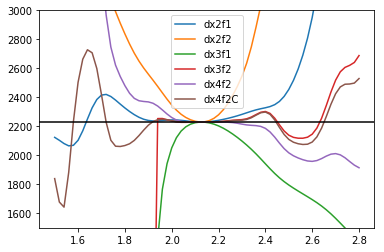

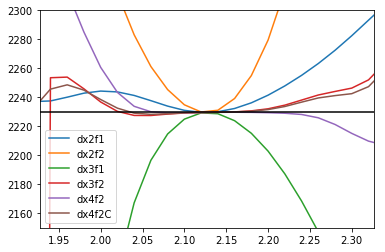

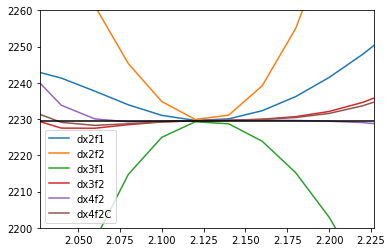

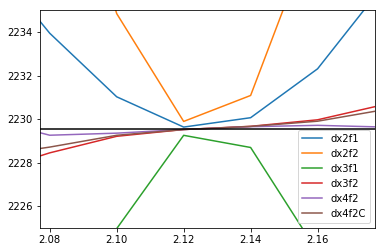

In [24]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2229.5584,color='black')
plt.ylim(1500,3000)
plt.legend()
plt.savefig('2nd_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2229.5584,color='black')
plt.xlim(1.927,2.327) #+-.2 bohr
plt.ylim(2150,2300)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2229.5584,color='black')
plt.xlim(2.027,2.227) #+-.1 bohr
plt.ylim(2200,2260)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2229.5584,color='black')
plt.xlim(2.077,2.177) #+-.05 bohr
plt.ylim(2225,2235)
plt.savefig('2nd_05fd_zoom.jpg')
plt.legend()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


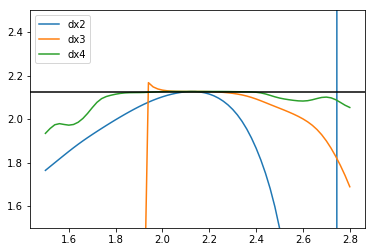

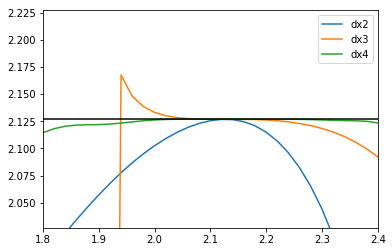

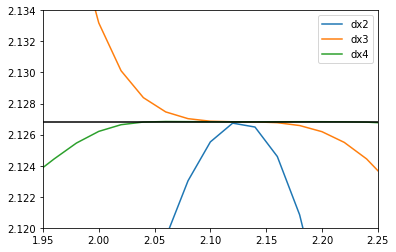

In [21]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.126828216879092,color='black')
plt.ylim(1.5,2.5)
plt.legend()
plt.savefig('dist_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.126828216879092,color='black')
plt.ylim(2.027,2.227)
plt.xlim(1.8,2.4)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.126828216879092,color='black')
plt.ylim(2.12,2.134)
plt.xlim(1.95,2.25)
plt.legend()
plt.savefig('dist_05fd_zoom.jpg')
plt.show()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


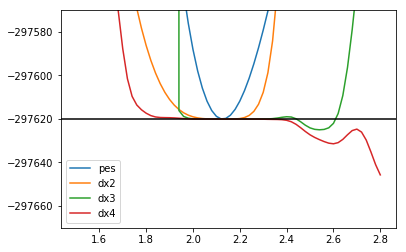

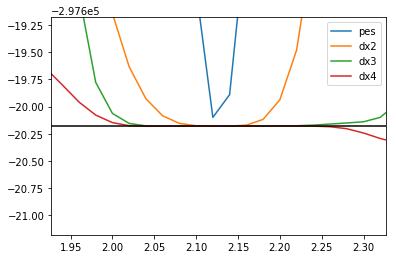

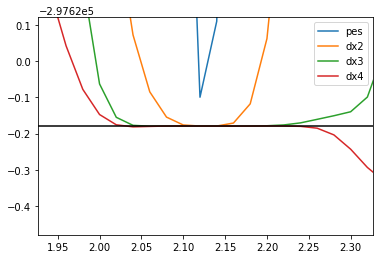

In [22]:
kjm=2625.50

plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-113.35752407328619*kjm,color='black')
plt.ylim(-113.35752407328619*kjm-50,-113.35752407328619*kjm+50)
plt.legend()
plt.savefig('en_05fd.jpg')
plt.show()

# chemical accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-113.35752407328619*kjm,color='black')
plt.ylim(-113.35752407328619*kjm-1,-113.35752407328619*kjm+1)
plt.xlim(1.927,2.327) 
plt.legend()
plt.show()

# .1 Kj/mol accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-113.35752407328619*kjm,color='black')
plt.ylim(-113.35752407328619*kjm-.3,-113.35752407328619*kjm+.3)
plt.xlim(1.927,2.327)
plt.legend()
plt.savefig('en_05fd_zoom.jpg')
plt.show()

In [23]:
%store DerivativesH05

Stored 'DerivativesH05' (list)


In [3]:
%store -r